# Training Machine Learning Algorithms for Classification
  
Topics covered in this chapter:  
 - Building intuition for machine learning algorithms
 - Using pandas, numpy, and matplotlib to read in, process, and visualize data
 - Implementing linear classification algorithms in Python

### Implementing a perceptron learning algorithm in Python

In [15]:
import numpy as np

class Perceptron(object):
    '''
    Perceptron classifier.
    
    Parameters
    ------------
    eta: float
        learning rate (between 0.0 and 1.0)
        n_iter: int
            Passes over the training dataset
            
    Attributes:
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
    '''
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        '''
        Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number samples and number of features
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        -----------
        self : object
        '''
        
        self.w_ = np.zeros(1+ X.shape[1]) #add 1 for the zero-weight (that is, the threshold)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi #delta_w = perceptron learning rule
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''
        Calculate net input
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0] #z = w^T*x (where ^T is the vector dot product)
    
    def predict(self, X):
        '''
        Return class label after unit step
        '''
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
    

### Training a Perceptron model on the Iris dataset
  
  For simplicity, choose two classes, *Setosa* and *Versicolor*, and two features, *sepal length* and *petal length* 

In [3]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.head()

//anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.3.1 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


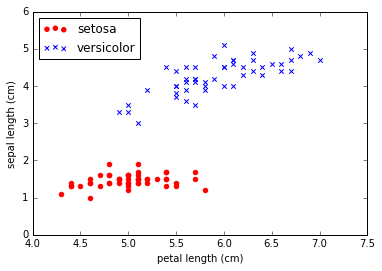

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

y_1 = iris.loc[(iris[4] == 'Iris-setosa')] 
y_2 = iris.loc[(iris[4] == 'Iris-versicolor')]
combined = pd.concat([y_1, y_2], axis=0)

y = combined[4].values #numpy array
y = np.where(y == 'Iris-setosa', -1, 1)
X = combined.iloc[:, [0, 2]].values #numpy array

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.legend(loc='upper left')

plt.show()


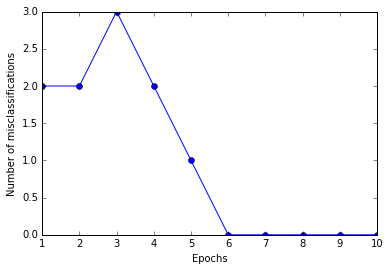

In [18]:
ppn = Perceptron(eta=1.0, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, class_ in enumerate(np.unique(y)):
        plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=class_)

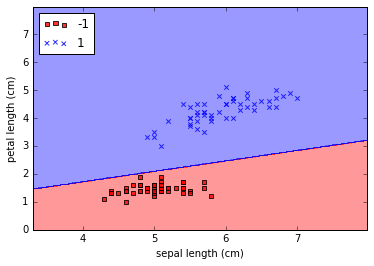

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

The perceptron learned a decision boundary that was able to classify all flower samples in the Iris training subset.

### Adaptive linear neurons and the convergence of learning
  
   - Single-layer neural network: ADAptive LInear NEuron (Adaline). Considered as an improvement on the perceptron.  
   - The difference is that we know to use the continuous valued output from the linear activation function to compute the model error and update the weights, rather than the binary class labels (y_hat)
  
  In supervised ML, a key is to define an objective function that is to be optimized. Often called a cost function that we want to minimize.

** Implementing an Adaptive Linear Neuron **

In [37]:
class AdalineGD(object):
    '''
    ADAptive LInear NEuron classifier
    
      Parameters
    ------------
    eta: float
        learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
            
    Attributes:
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    '''
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number samples and number of features
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        -----------
        self : object
        '''
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) #matrix-vector multiplication
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        '''
        Calculate net input
        '''
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        '''
        Compute linear activation
        '''
        return self.net_input(X)
    
    def predict(self, X):
        '''
        Return class label after unit step
        '''
        return np.where(self.activation(X) >= 0.0, 1, -1)
        

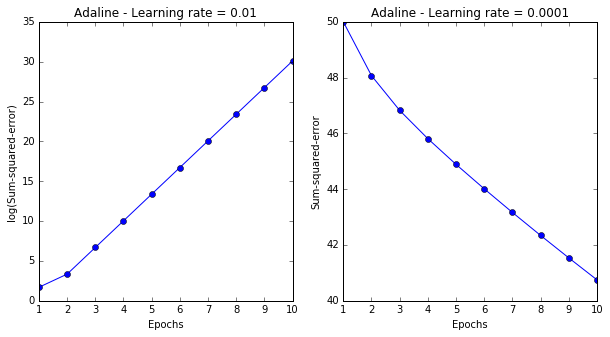

In [44]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate = 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate = 0.0001')    

plt.show()

**Feature Scaling**  
Gradient descent is one of many algorithms that benefit from feature scaling, which facilitates optimal performance  
Standardization: gives the data the property of a standard normal distribution

In [45]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean())/X[:,0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean())/X[:,1].std()

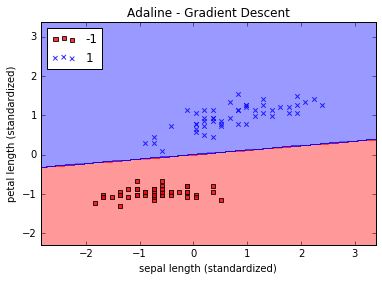

In [47]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.show()


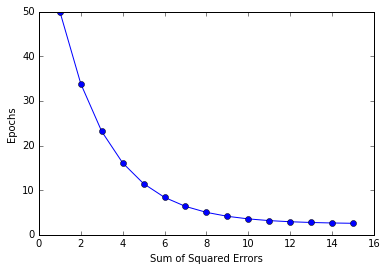

In [49]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Sum of Squared Errors')
plt.ylabel('Epochs')
plt.show()

### Large scale machine learning and stochastic gradient descent
 - Instead of updating the weights based on the sum of the accumulated errors over all samples x^(i), we update the weights incrementally for each training sample
 - Each gradient (step toward the minimum) is calculated on a single training example (but then applied to all the weights)
 - Has the benefit of being noisier, so the stochastic gradient can more easily escape local minima
 - Data needs to be presented in a random order (why?)
 - The fixed learning rate is replaced by an adaptive learning rate that decreases over time (why?)

In [50]:
class AdalineSGD(object):
    '''
    ADAptive LInear NEuron classifier
    
      Parameters
    ------------
    eta: float
        learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
            
    Attributes:
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
    shuffle : bool (default=True)
        Shuffles training data every epoch if True to prevent cycles
    random_state : int (default: None)
        set random state for shuffling and initializing weights
        
    '''
    
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        '''
        Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number samples and number of features
        y : array-like, shape = [n_samples]
            Target values
        
        Returns
        -----------
        self : object
        '''
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        '''
        Fit training data without reinitializaing the weights
        '''
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def shuffle(self, X, y):
        '''
        Shuffle training data
        '''
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        '''
        Initialize weights to zeros
        '''
        
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        '''
        Apply Adaline learning rule to update weights
        '''
        
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        '''
        Calculate net input
        '''
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        '''
        Compute linear activation
        '''
        return self.net_input(X)
    
    def predict(self, X):
        '''
        Return class label after unit step
        '''
        return np.where(self.activation(X) >= 0.0, 1, -1)
        